In [1]:
import json
import jieba
from tqdm import tqdm
from torch import nn
from torch import optim
import torch
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
with open("../final_dataset.json", "r", encoding="utf-8") as f:
    content = json.load(f)

In [2]:
len(content)

7352

In [4]:
count={}
map1={-1:'积极',0:'中立',1:'消极'}
for term in content:
    temp=[]
    for item in term['institution']:
        if map1[int(item['sentiment_level'])] not in count.keys():
            count[map1[int(item['sentiment_level'])]]=1
        else:
             count[map1[int(item['sentiment_level'])]]= count[map1[int(item['sentiment_level'])]]+1
print(count)
for i in count:
    print(count[i]/sum(count.values()))

{'消极': 4896, '积极': 2350, '中立': 907}
0.6005151477983565
0.28823745860419475
0.1112473935974488


In [5]:
#训练集数据
import json
import jieba
from tqdm import tqdm
from torch import nn
from torch import optim
import torch
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
with open("../原始数据划分/train.json", "r", encoding="utf-8") as f:
    content = json.load(f)
count={}
map1={-1:'积极',0:'中立',1:'消极'}
set1=set()
for term in content:
    temp=[]
    for item in term['institution']:
        set1.add(item['ins_name'])
        if map1[int(item['sentiment_level'])] not in count.keys():
            count[map1[int(item['sentiment_level'])]]=1
        else:
             count[map1[int(item['sentiment_level'])]]= count[map1[int(item['sentiment_level'])]]+1
print("实体数目:",len(set1))
ccc=0
for i in set1:
    ccc+=len(i)
print("平均实体长度:",ccc/len(set1))
print("句子数:",len(content))
print(count)
for i in count:
    print(count[i]/sum(count.values()))

实体数目: 3699
平均实体长度: 5.791294944579616
句子数: 5881
{'消极': 3921, '积极': 1890, '中立': 721}
0.6002755664421311
0.2893447642375995
0.11037966932026945


In [6]:
#验证集数据
import json
import jieba
from tqdm import tqdm
from torch import nn
from torch import optim
import torch
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
with open("../原始数据划分/dev.json", "r", encoding="utf-8") as f:
    content = json.load(f)
count={}
set1=set()
map1={-1:'积极',0:'中立',1:'消极'}
for term in content:
    temp=[]
    for item in term['institution']:
        set1.add(item['ins_name'])
        if map1[int(item['sentiment_level'])] not in count.keys():
            count[map1[int(item['sentiment_level'])]]=1
        else:
             count[map1[int(item['sentiment_level'])]]= count[map1[int(item['sentiment_level'])]]+1
print("实体数目:",len(set1))
ccc=0
for i in set1:
    ccc+=len(i)
print("平均实体长度:",ccc/len(set1))
print("句子数:",len(content))
print(count)
for i in count:
    print(count[i]/sum(count.values()))

实体数目: 731
平均实体长度: 5.448700410396717
句子数: 735
{'消极': 496, '积极': 222, '中立': 101}
0.6056166056166056
0.27106227106227104
0.12332112332112333


In [7]:
#测试集数据
import json
import jieba
from tqdm import tqdm
from torch import nn
from torch import optim
import torch
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
with open("../原始数据划分/test.json", "r", encoding="utf-8") as f:
    content = json.load(f)
count={}
set1=set()
map1={-1:'积极',0:'中立',1:'消极'}
for term in content:
    temp=[]
    for item in term['institution']:
        set1.add(item['ins_name'])
        if map1[int(item['sentiment_level'])] not in count.keys():
            count[map1[int(item['sentiment_level'])]]=1
        else:
             count[map1[int(item['sentiment_level'])]]= count[map1[int(item['sentiment_level'])]]+1
print("实体数目:",len(set1))
ccc=0
for i in set1:
    ccc+=len(i)
print("平均实体长度:",ccc/len(set1))
print("句子数:",len(content))
print(count)
for i in count:
    print(count[i]/sum(count.values()))

实体数目: 707
平均实体长度: 5.108910891089109
句子数: 736
{'积极': 238, '消极': 479, '中立': 84}
0.29712858926342073
0.5980024968789014
0.10486891385767791


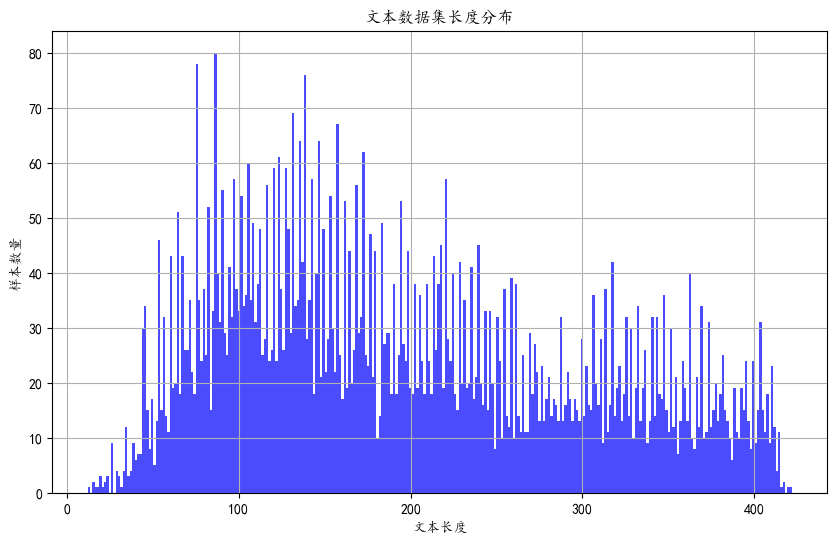

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['kaiti']
# 假设你有一个包含文本数据的列表，每个元素是一个文本样本


# 计算每个文本的长度
text_lengths = [len(text['text']) for text in content]

# 绘制长度分布图
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=300, color='blue', alpha=0.7)
plt.title('文本数据集长度分布')
plt.xlabel('文本长度')
plt.ylabel('样本数量')
plt.grid(True)
plt.savefig('长度分布100.png')
plt.show()


In [7]:
content[0]

{'title': 'ASMPT（00522）2月10日注销36.73万股已回购股份',
 'text': 'ASMPT(00522)发布公告,于2023年2月10日,该公司注销36.73万股已回购股份。',
 'institution': [{'ins_name': 'ASMPT',
   'sentiment_level': 1,
   'label_type': '股票/股票回购'}]}

In [9]:
avg=0
maxin=0
minest=9999
count=0
i=0
for term in content:
    le=len(''.join(term['text'].split('\n')))
    count+=le
    i+=1
    if le>maxin:
         maxin=le
#          print(''.join(term['text'].split('\n')))
    if le<minest:
        minest=le
#         print(''.join(term['text'].split('\n')))
avg=count/i
avg,maxin,minest,i

(197.370239390642, 410, 12, 7352)

In [10]:
avg=0
maxin=0
minest=9999
count=0
i=0
for term in content:
    temp=[]
    for item in term['institution']:
        le=len(item['ins_name'])
        count+=le
        i+=1
        if le>maxin:
            maxin=le
#             print(''.join(item['ins_name'].split('\n')))
        if le<minest:
            minest=le
#             print(''.join(item['ins_name'].split('\n')))
avg=count/i
avg,maxin,minest,i

(5.18214154299031, 46, 2, 8153)

In [11]:
i=0
for term in content:
    temp=[]
    for item in term['institution']:
        i+=1
i

8153

In [12]:
2840/i

0.348338035079112

In [21]:
#一级分类
count={}
i=0
for term in content:
    temp=[]
    for item in term['institution']:
        i+=1
        if item['label_type'].split("/")[0] not in count.keys():
            count[item['label_type'].split("/")[0]]=1
        else:
            count[item['label_type'].split("/")[0]]=count[item['label_type'].split("/")[0]]+1
dict(sorted(count.items(), key=lambda x: x[1],reverse=True)),2257/i

({'经营问题': 2257,
  '股票': 1784,
  '股东': 1314,
  '财务': 904,
  '融资': 597,
  '信用': 473,
  '合规': 335,
  '管理问题': 325,
  '投资并购': 164},
 0.2768306144977309)

In [14]:
#二级分类
count={}
i=0
for term in content:
    temp=[]
    for item in term['institution']:
        i+=1
        if item['label_type'] not in count.keys():
            count[item['label_type']]=1
        else:
            count[item['label_type']]=count[item['label_type']]+1
dict(sorted(count.items(), key=lambda x: x[1],reverse=True)),i,len(count.keys())

({'财务/利润公布': 547,
  '股东/股东减持': 495,
  '股东/股东增持': 456,
  '股票/股价变动': 437,
  '股票/限售股解禁': 380,
  '经营问题/开展合作': 376,
  '信用/评级变动': 372,
  '股票/股票回购': 352,
  '经营问题/项目中标': 340,
  '经营问题/机构调研': 255,
  '财务/利润预告': 224,
  '股东/股东质押': 214,
  '经营问题/新公司成立': 196,
  '经营问题/知识产权': 195,
  '经营问题/销量、份额变动': 180,
  '管理问题/董监高变动': 178,
  '融资/资金流动': 170,
  '经营问题/资质变动': 170,
  '融资/融资融券': 167,
  '股票/股权激励&员工持股计划': 149,
  '投资并购/投资事件': 141,
  '股票/股票停牌': 115,
  '经营问题/技术质控变动': 114,
  '股票/股票评级调整': 112,
  '融资/公司上市': 107,
  '融资/股票增发': 103,
  '经营问题/政府补贴': 102,
  '信用/列为被执行人': 90,
  '财务/资产变动': 77,
  '经营问题/产能产量变动': 75,
  '合规/监管问询': 75,
  '合规/公司涉诉': 75,
  '合规/行政处罚': 73,
  '股东/解除质押': 72,
  '股东/股东变动': 71,
  '合规/立案调查': 70,
  '股票/股票挂牌': 70,
  '经营问题/项目动态': 70,
  '管理问题/董监高违纪': 67,
  '股票/股份冻结': 65,
  '经营问题/产品上市': 65,
  '管理问题/员工变动': 64,
  '股票/股票复牌': 62,
  '融资/融资动态': 38,
  '股票/股票退市': 29,
  '经营问题/业务变化': 23,
  '投资并购/并购重组': 22,
  '经营问题/产品价格变动': 21,
  '财务/变更会计师': 20,
  '合规/澄清公告': 19,
  '财务/其他财务动态': 16,
  '经营问题/整体停产停业': 16,
  '财务/债务拖欠': 15,
  '

In [15]:
with open('label_type.txt','w',encoding='utf-8') as f:
    for i in count.keys():
        f.write(i+'\n')

In [16]:
content[0],len(content)

({'title': 'ASMPT（00522）2月10日注销36.73万股已回购股份',
  'text': 'ASMPT(00522)发布公告,于2023年2月10日,该公司注销36.73万股已回购股份。',
  'institution': [{'ins_name': 'ASMPT',
    'sentiment_level': 1,
    'label_type': '股票/股票回购'}]},
 7352)

In [17]:
with open('停用词.txt','r',encoding='utf-8') as f:
    lines=f.readlines()
tingyong=[line.strip()for line in lines]
tingyong

['',
 '———',
 '》），',
 '）÷（１－',
 '”，',
 '）、',
 '＝（',
 ':',
 '→',
 '℃',
 '&',
 '*',
 '一一',
 '~~~~',
 '’',
 '.',
 '『',
 '.一',
 './',
 '--',
 '』',
 '＝″',
 '【',
 '［＊］',
 '｝＞',
 '［⑤］］',
 '［①Ｄ］',
 'ｃ］',
 'ｎｇ昉',
 '＊',
 '//',
 '［',
 '］',
 '［②ｅ］',
 '［②ｇ］',
 '＝｛',
 '}',
 '，也',
 '‘',
 'Ａ',
 '［①⑥］',
 '［②Ｂ］',
 '［①ａ］',
 '［④ａ］',
 '［①③］',
 '［③ｈ］',
 '③］',
 '１．',
 '－－',
 '［②ｂ］',
 '’‘',
 '×××',
 '［①⑧］',
 '０：２',
 '＝［',
 '［⑤ｂ］',
 '［②ｃ］',
 '［④ｂ］',
 '［②③］',
 '［③ａ］',
 '［④ｃ］',
 '［①⑤］',
 '［①⑦］',
 '［①ｇ］',
 '∈［',
 '［①⑨］',
 '［①④］',
 '［①ｃ］',
 '［②ｆ］',
 '［②⑧］',
 '［②①］',
 '［①Ｃ］',
 '［③ｃ］',
 '［③ｇ］',
 '［②⑤］',
 '［②②］',
 '一.',
 '［①ｈ］',
 '.数',
 '［］',
 '［①Ｂ］',
 '数/',
 '［①ｉ］',
 '［③ｅ］',
 '［①①］',
 '［④ｄ］',
 '［④ｅ］',
 '［③ｂ］',
 '［⑤ａ］',
 '［①Ａ］',
 '［②⑧］',
 '［②⑦］',
 '［①ｄ］',
 '［②ｊ］',
 '〕〔',
 '］［',
 '://',
 '′∈',
 '［②④',
 '［⑤ｅ］',
 '１２％',
 'ｂ］',
 '...',
 '...................',
 '…………………………………………………③',
 'ＺＸＦＩＴＬ',
 '［③Ｆ］',
 '」',
 '［①ｏ］',
 '］∧′＝［',
 '∪φ∈',
 '′｜',
 '｛－',
 '②ｃ',
 '｝',
 '［③①］',
 'Ｒ．Ｌ．',
 '［①Ｅ］',
 'Ψ',
 '－［＊］－',
 '↑',
 '.日',
 '［

In [18]:
vocab={}
text=[''.join(term['text'].split('\n')) for term in content]
for example in tqdm(text):
    words=jieba.lcut(example)
    for word in words:
        if word not in tingyong:
            if word not in vocab.keys():
                vocab[word]=1
            else:
                vocab[word]+=1

  0%|                                                                                         | 0/7352 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\14446\AppData\Local\Temp\jieba.cache
Loading model cost 0.843 seconds.
Prefix dict has been built successfully.
100%|█████████████████████████████████████████████████████████████████████████████| 7352/7352 [00:14<00:00, 520.28it/s]


In [19]:
dict(sorted(vocab.items(), key=lambda x: x[1],reverse=True))

{'公司': 14045,
 '月': 7950,
 '年': 7361,
 '日': 6319,
 '股份': 5736,
 '2': 5480,
 '2023': 4368,
 '占': 4295,
 '亿元': 3962,
 '万元': 3493,
 '元': 3237,
 '有限公司': 3156,
 '1': 3145,
 '万股': 2967,
 '2022': 2912,
 '公告': 2623,
 '股东': 2212,
 '总': 2201,
 '不': 2097,
 '3': 2060,
 '同比': 1976,
 '投资': 1975,
 '股': 1917,
 '证券': 1873,
 '增长': 1737,
 '股本': 1686,
 '科技': 1636,
 '收入': 1591,
 '截至': 1589,
 '约': 1561,
 '资金': 1559,
 '发布公告': 1498,
 '6': 1479,
 '显示': 1475,
 '营业': 1453,
 '机构': 1436,
 '集团': 1434,
 '净利润': 1402,
 '项目': 1387,
 '比例': 1385,
 '上市': 1384,
 '持股': 1357,
 '融资': 1338,
 '本次': 1316,
 '金额': 1303,
 '买入': 1278,
 '数据': 1257,
 '减持': 1257,
 '信息': 1226,
 '称': 1206,
 '构成': 1190,
 '公布': 1188,
 '增持': 1188,
 'SZ': 1168,
 '近': 1132,
 '计划': 1122,
 '后': 1115,
 '调研': 1100,
 '中国': 1097,
 '控股': 1095,
 '业务': 1091,
 '发布': 1087,
 '融券': 1074,
 'SH': 1065,
 '披露': 1065,
 '产品': 1059,
 '收到': 1046,
 '风险': 1039,
 '主要': 1038,
 '30': 1034,
 '市场': 1016,
 '近日': 1014,
 '已': 989,
 '相关': 980,
 '累计': 944,
 '年度': 943,
 '10': 941,
 '交易': 925,

根据词频，开始生成词云...


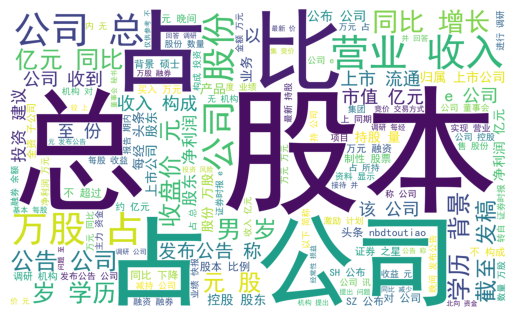

In [20]:

def remove_stop_words(f):
    stop_words = ['于','今','已','将','其','中','等','及','近','与','nan','的','就','我','你','了','和','也','不是','吧','都','是','但','耳机','还有','感觉','觉得','还','有','月','在','日','年','为','限','后']        # 加载停用词
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f
def create_word_cloud(f,name):
    print('根据词频，开始生成词云...')
    f = remove_stop_words(f)   # 去掉停用词
    cut_text = jieba.cut(f)
    cut_text = " ".join(cut_text)
    
    # 设置词云
    wc = WordCloud(
        background_color='white',
        max_words=120,
        width=2000,
        height=1200,
        font_path='./simhei.ttf',# 设置中文字体
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file(name+'_wordcloud.jpg')
    # 显示词云文件
    plt.imshow(wordcloud)   
    plt.axis("off")  # 关闭坐标
    plt.show()  #显示词云图
create_word_cloud(''.join(text),"词云")